# Lab 1b Introduction to Google Earth Engine

This lab will introduce you data accessing and preparation through Google Earth Engine.

You will:

*   Authenticate and access Google Earth Engine
*   Familiarize with two GEE workflows with different programming languaguaes and
*   Setup environment on Google Colab and Setup GEE API
*   Data access and data preparation through programming
*   know some key indices and their false color combinations, e.g. NDVI (Normalized Difference Vegetation Index), NDWI (Normalized Difference Water Index) and NDBI (Normalized Difference Built-up Index)




## Register a Google Earth Engine (GEE) account
The core of GEE is its Code Editor, which is accessed through a Google account.

Prepare a Google account: Make sure you have a Google account (such as Gmail).

To access the registration page: Navigate to the ![Google Earth EngineRegistration](https://code.earthengine.google.com/register) page.

Fill out a form: GEE will ask you to fill out a simple form providing your name, email, institution (your university or department will suffice), country, and a brief description of how you will use GEE (for example: "Educational labs for a remote sensing course.").

Submit your application: Submit the registration form.

Waiting for approval: The GEE team will usually approve your application within 1-3 days via email. Once approved, you will have access toGEE Code EditorGet to work.

## Environment Setup


In [ ]:
# Earth Engine & Visualization Tools
import ee                   # Access Google Earth Engine Python API
import geemap               # Easy geospatial visualization and analysis in GEE

## Authenticate and initialize
Run the ee.Authenticate function to authenticate your access to Earth Engine servers and ee.Initialize to initialize it. Upon running the following cell you'll be asked to grant Earth Engine access to your Google account. Follow the instructions printed to the cell.

In [ ]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='your-project-id-here')

## Data access and preparation


### Define Regions of Interest (ROIs)


In [19]:
roi = ee.Geometry.Rectangle([-122.5, 46.0, -121.8, 46.4]) #Define the Region of Interest to Mount St. Helens

### load the Sentinal-2 2A

In [20]:
s2_collection = ee.ImageCollection('COPERNICUS/S2_HARMONIZED') \
                    .filterBounds(roi) \
                    .filterDate('2024-07-01', '2024-08-10') \
                    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))

### Select bands for NDVI
NDVI is calculated from Sentinel-2’s red and near-infrared bands as (B8 − B4) / (B8 + B4).

NDVI stands for Normalized Difference Vegetation Index. It is a widely used spectral index that measures the presence and health of vegetation using satellite imagery. NDVI is calculated from the near-infrared (NIR) and red bands of optical sensors. Usually,Healthy vegetation reflects more NIR and absorbs more red light, resulting in higher NDVI values (closer to 1), and Bare soil, urban surfaces, or water have lower NDVI values (closer to 0 or negative).

Below shows the typical NDVI range:

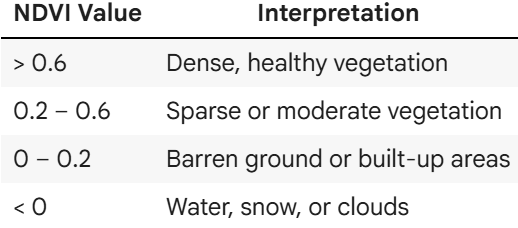

In this lab, we use NDVI derived from Sentinel-2 imagery to represent vegetation coverage.

In [22]:
# Select bands for NDVI calculation
s2_image = s2_collection.median()
ndvi = s2_image.normalizedDifference(['B8', 'B4']).rename('NDVI')

# Update NDVI visualization parameters
ndvi_vis_params = {
    'min': -0.5,
    'max': 1,
    'palette': ['brown', 'yellow', 'green']
}

### Create a map and visualize it

In [23]:
# Create a map
Map = geemap.Map(center=[46.1912, -122.1950], zoom=10)
Map.clear_layers()
Map.add_basemap('SATELLITE')

# Remove all default layers (basemaps or any others)
Map.clear_layers()
Map.add_basemap('SATELLITE')

# Visualize Sentinel-2 NDVI
Map.addLayer(ndvi.clip(roi), ndvi_vis_params, 'NDVI')

# Add color bar to map for NDVI visualization
Map.add_colorbar(ndvi_vis_params, label="Sentinel-2 NDVI", position='bottomright')

# Display the map
Map

Map(center=[46.1912, -122.195], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…